In [2]:
# /Users/aimitmk/Documents/2025_会計研_春/損保プライシング/sonpo-pricing-2023/spain_auto_data_python.ipynb

# Cell 1: ライブラリのインポートと設定
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

# 再現性のための乱数シード設定
np.random.seed(42)

# 可視化スタイル設定
# plt.style.use('seaborn-whitegrid')
# sns.set(style="whitegrid", palette="muted", font_scale=1.2)
# plt.rcParams['figure.figsize'] = (12, 8)

# 警告の非表示
import warnings
warnings.filterwarnings('ignore')

print("Libraries imported successfully!")

Libraries imported successfully!


# スペイン自動車保険データの探索的データ分析 (EDA)

このノートブックでは、`auto_processed.csv`ファイルのデータを分析し、データの特性、関係性、パターンを探ります。

In [6]:
# Cell 2: データの読み込みと概要確認
# データファイルの読み込み
df = pd.read_csv('dataset/auto_processed.csv')

# 最初の5行を表示
print("Dataset Preview:")
display(df.head())

# データセットの基本情報
print(f"\nDataset Shape: {df.shape[0]} rows, {df.shape[1]} columns")
print("\nColumn Information:")
df.info()

Dataset Preview:


,PolID,year,gender,Age_client,Policy_PaymentMethodA,Client_Seniority,Retention,age_of_car_M,Car_power_M,Car_2ndDriver_M,metro_code,NClaims1,Claims1,average_Claims1
0,1,1,1,84,0,16.963723,1,13,90.0,0,0,0,0.0,0.0
1,2,1,1,83,1,16.796715,1,0,177.0,0,0,0,0.0,0.0
2,3,1,1,85,1,18.603696,1,0,163.0,0,0,0,0.0,0.0
3,4,1,1,85,1,20.484600,1,0,90.0,0,0,0,0.0,0.0
4,5,1,1,82,1,7.901437,1,20,115.0,0,0,0,0.0,0.0



Dataset Shape: 122935 rows, 14 columns

Column Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 122935 entries, 0 to 122934
Data columns (total 14 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   PolID                  122935 non-null  int64  
 1   year                   122935 non-null  int64  
 2   gender                 122935 non-null  int64  
 3   Age_client             122935 non-null  int64  
 4   Policy_PaymentMethodA  122935 non-null  int64  
 5   Client_Seniority       122935 non-null  float64
 6   Retention              122935 non-null  int64  
 7   age_of_car_M           122935 non-null  int64  
 8   Car_power_M            122935 non-null  float64
 9   Car_2ndDriver_M        122935 non-null  int64  
 10  metro_code             122935 non-null  int64  
 11  NClaims1               122935 non-null  int64  
 12  Claims1                122935 non-null  float64
 13  average_Claims1        12293

## データの基本情報

上記の出力から確認できる情報:
- 行数と列数: データセットの全体像
- 各列のデータ型: カテゴリ変数と数値変数の区別
- 欠損値の有無: データの完全性

主な変数の説明（推測）:
- カテゴリカル変数: [特定されたカテゴリ変数名を列挙]
- 数値変数: [特定された数値変数名を列挙]
- ターゲット変数: [推測されるターゲット変数、例: price]

In [7]:
# Cell 3: 基本統計量の確認
# 数値変数の基本統計量
print("Numerical Variables - Basic Statistics:")
display(df.describe().T)

# 追加の統計量（歪度、尖度）の計算
numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns
skewness = df[numeric_cols].apply(lambda x: stats.skew(x.dropna()))
kurtosis = df[numeric_cols].apply(lambda x: stats.kurtosis(x.dropna()))

stats_df = pd.DataFrame({
    'Skewness': skewness,
    'Kurtosis': kurtosis
})

print("\nSkewness and Kurtosis:")
display(stats_df)

Numerical Variables - Basic Statistics:


,count,mean,std,min,25%,50%,75%,max
PolID,122935.0,20079.288518,11729.190397,1.000000,9799.000000,20087.000000,30221.000000,40284.000000
year,122935.0,2.456835,1.352461,1.000000,1.000000,2.000000,3.000000,5.000000
gender,122935.0,0.778224,0.415443,0.000000,1.000000,1.000000,1.000000,1.000000
Age_client,122935.0,61.122691,13.149992,18.000000,51.000000,61.000000,71.000000,99.000000
Policy_PaymentMethodA,122935.0,0.770684,0.420395,0.000000,1.000000,1.000000,1.000000,1.000000
Client_Seniority,122935.0,11.722050,5.297434,5.002053,7.920602,9.994524,14.439767,48.706366
Retention,122935.0,0.761695,0.426048,0.000000,1.000000,1.000000,1.000000,1.000000
age_of_car_M,122935.0,10.306446,6.469055,0.000000,5.000000,11.000000,15.000000,72.000000
Car_power_M,122935.0,111.532338,44.413744,4.000000,82.000000,105.000000,130.000000,560.000000
Car_2ndDriver_M,122935.0,0.138496,0.345421,0.000000,0.000000,0.000000,0.000000,1.000000



Skewness and Kurtosis:


,Skewness,Kurtosis
PolID,0.009088,-1.215090
year,0.517370,-0.964902
gender,-1.339416,-0.205964
Age_client,-0.020226,-0.689186
Policy_PaymentMethodA,-1.287765,-0.341662
Client_Seniority,1.447533,2.697373
Retention,-1.228482,-0.490832
age_of_car_M,0.292062,-0.003364
Car_power_M,1.913437,7.755267
Car_2ndDriver_M,2.093129,2.381188


In [8]:
# Cell 4: カテゴリ変数の分析
# カテゴリ変数の特定
cat_cols = df.select_dtypes(include=['object', 'category']).columns

# 各カテゴリ変数の分布表示
for col in cat_cols:
    print(f"\nDistribution of {col}:")
    count_df = df[col].value_counts().reset_index()
    count_df.columns = [col, 'Count']
    count_df['Percentage'] = (count_df['Count'] / df.shape[0]) * 100
    display(count_df.head(10))
    print(f"Unique values: {df[col].nunique()}")

In [9]:
# Cell 5: 欠損値の分析
# 欠損値の集計
missing_values = df.isnull().sum()
missing_percent = (missing_values / len(df)) * 100
missing_df = pd.DataFrame({
    'Missing Values': missing_values,
    'Percentage': missing_percent
})
missing_df = missing_df[missing_df['Missing Values'] > 0].sort_values('Percentage', ascending=False)

print("Missing Value Analysis:")
if missing_df.empty:
    print("No missing values found in the dataset.")
else:
    display(missing_df)

Missing Value Analysis:
No missing values found in the dataset.


In [10]:
# Cell 6: 欠損値の可視化
if not missing_df.empty:
    plt.figure(figsize=(10, 6))
    sns.heatmap(df.isnull(), cbar=False, cmap='viridis', yticklabels=False)
    plt.title('Missing Values Heatmap')
    plt.tight_layout()
    plt.show()
    
    # 欠損値の相関を可視化
    plt.figure(figsize=(12, 10))
    cols_with_missing = missing_df.index.tolist()
    if len(cols_with_missing) > 1:
        sns.heatmap(df[cols_with_missing].isnull().corr(), annot=True, cmap='coolwarm')
        plt.title('Correlation of Missing Values')
        plt.tight_layout()
        plt.show()

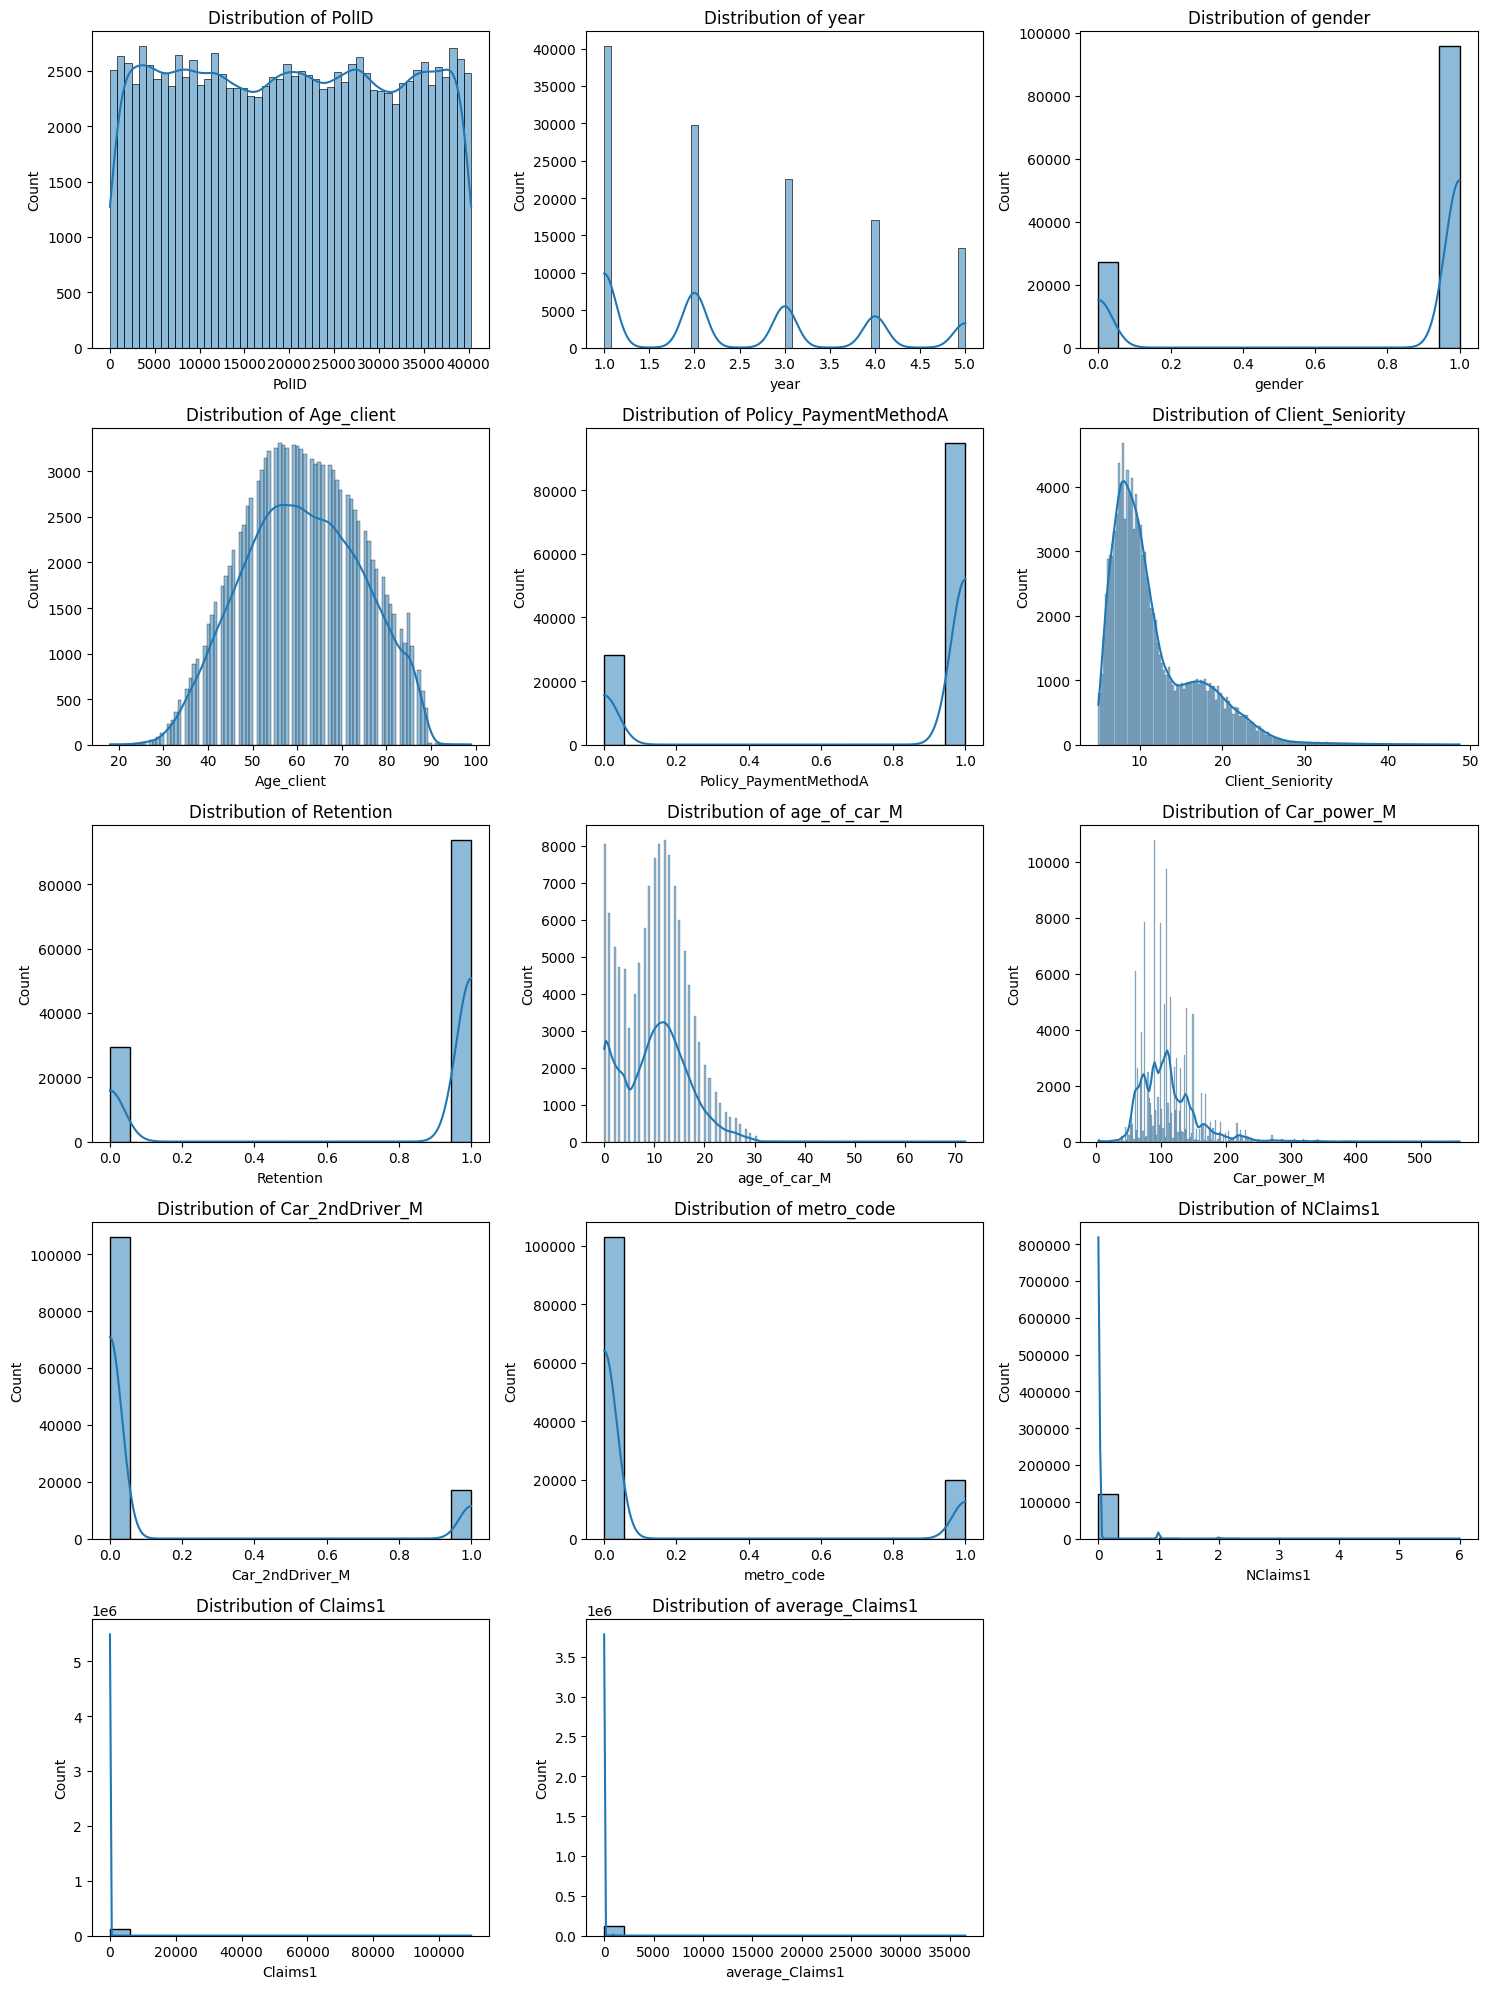

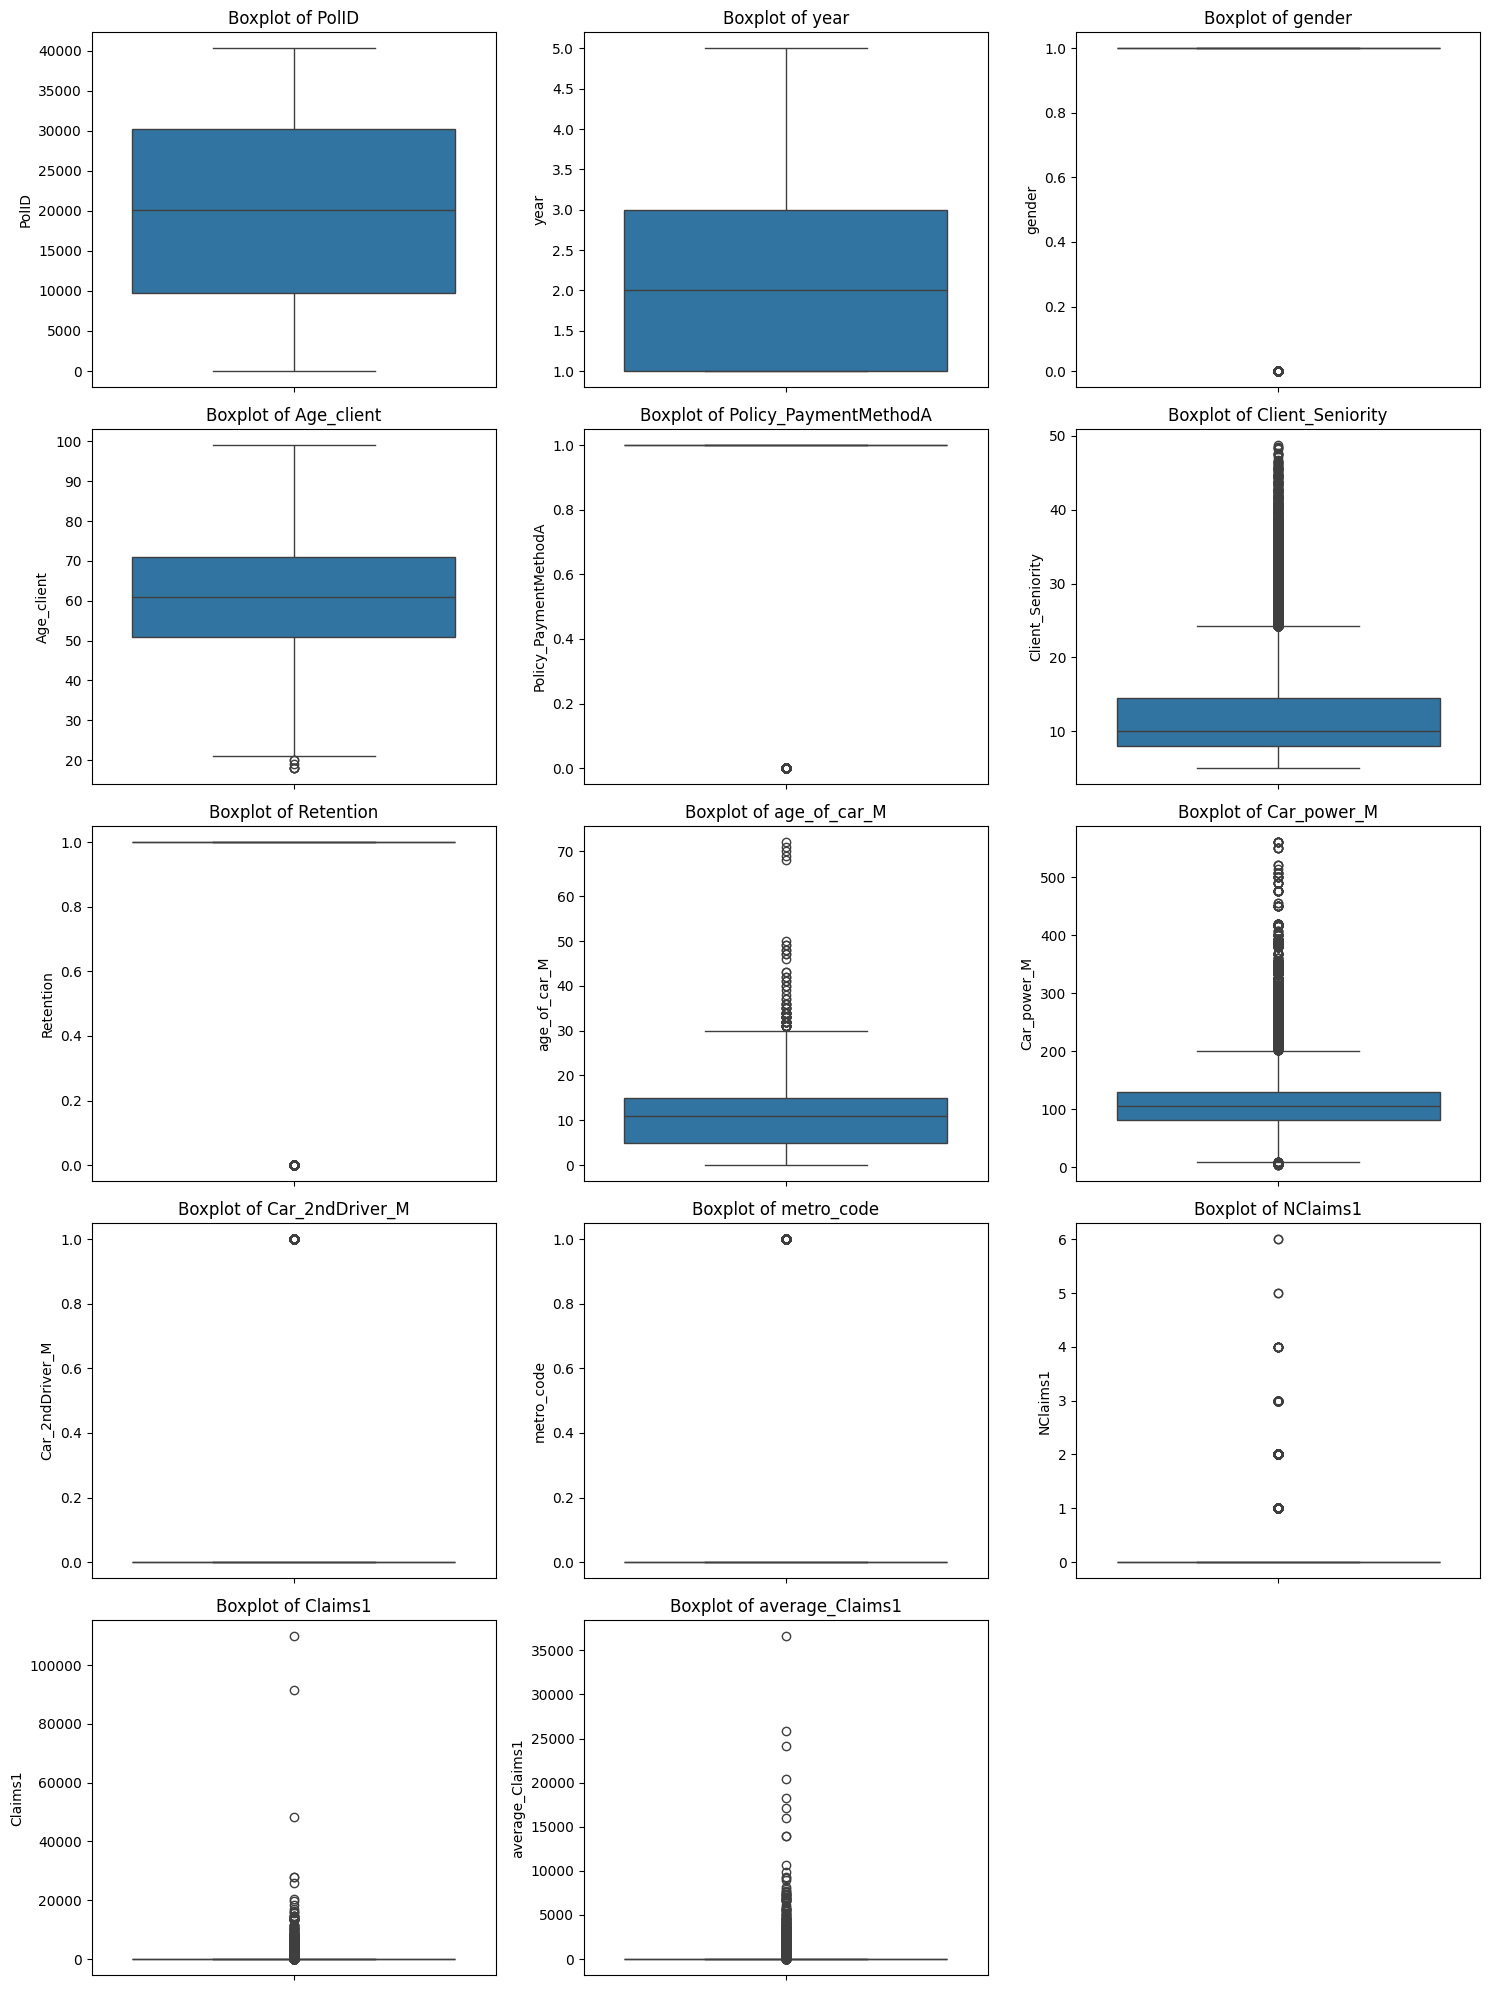

In [11]:
# Cell 7: 数値変数の分布可視化関数
def plot_distributions(dataframe, columns, n_cols=3):
    """数値変数のヒストグラムと箱ひげ図を表示する関数"""
    n_rows = (len(columns) + n_cols - 1) // n_cols
    
    # ヒストグラム
    fig = plt.figure(figsize=(15, n_rows * 4))
    for i, col in enumerate(columns):
        ax = fig.add_subplot(n_rows, n_cols, i+1)
        sns.histplot(dataframe[col].dropna(), kde=True, ax=ax)
        ax.set_title(f'Distribution of {col}')
    fig.tight_layout()
    plt.show()
    
    # 箱ひげ図
    fig = plt.figure(figsize=(15, n_rows * 4))
    for i, col in enumerate(columns):
        ax = fig.add_subplot(n_rows, n_cols, i+1)
        sns.boxplot(y=dataframe[col].dropna(), ax=ax)
        ax.set_title(f'Boxplot of {col}')
    fig.tight_layout()
    plt.show()

# 数値変数の分布可視化
numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns
plot_distributions(df, numeric_cols)

## 数値変数の分布分析

主な観察:
- [分布の特徴（正規分布に近いか、歪みがあるか）]
- [外れ値の存在]
- [変数ごとの特徴的なパターン]

In [12]:
# Cell 8: カテゴリ変数の可視化
def plot_category_counts(dataframe, columns, n_cols=2, max_categories=10):
    """カテゴリ変数の頻度を棒グラフで表示する関数"""
    n_rows = (len(columns) + n_cols - 1) // n_cols
    
    fig = plt.figure(figsize=(15, n_rows * 5))
    for i, col in enumerate(columns):
        ax = fig.add_subplot(n_rows, n_cols, i+1)
        
        # カテゴリ数が多い場合は上位のみ表示
        value_counts = dataframe[col].value_counts().head(max_categories)
        
        sns.barplot(x=value_counts.index, y=value_counts.values, ax=ax)
        ax.set_title(f'Top {max_categories} categories of {col}')
        ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')
    
    fig.tight_layout()
    plt.show()

# カテゴリ変数の可視化
cat_cols = df.select_dtypes(include=['object', 'category']).columns
if len(cat_cols) > 0:
    plot_category_counts(df, cat_cols)

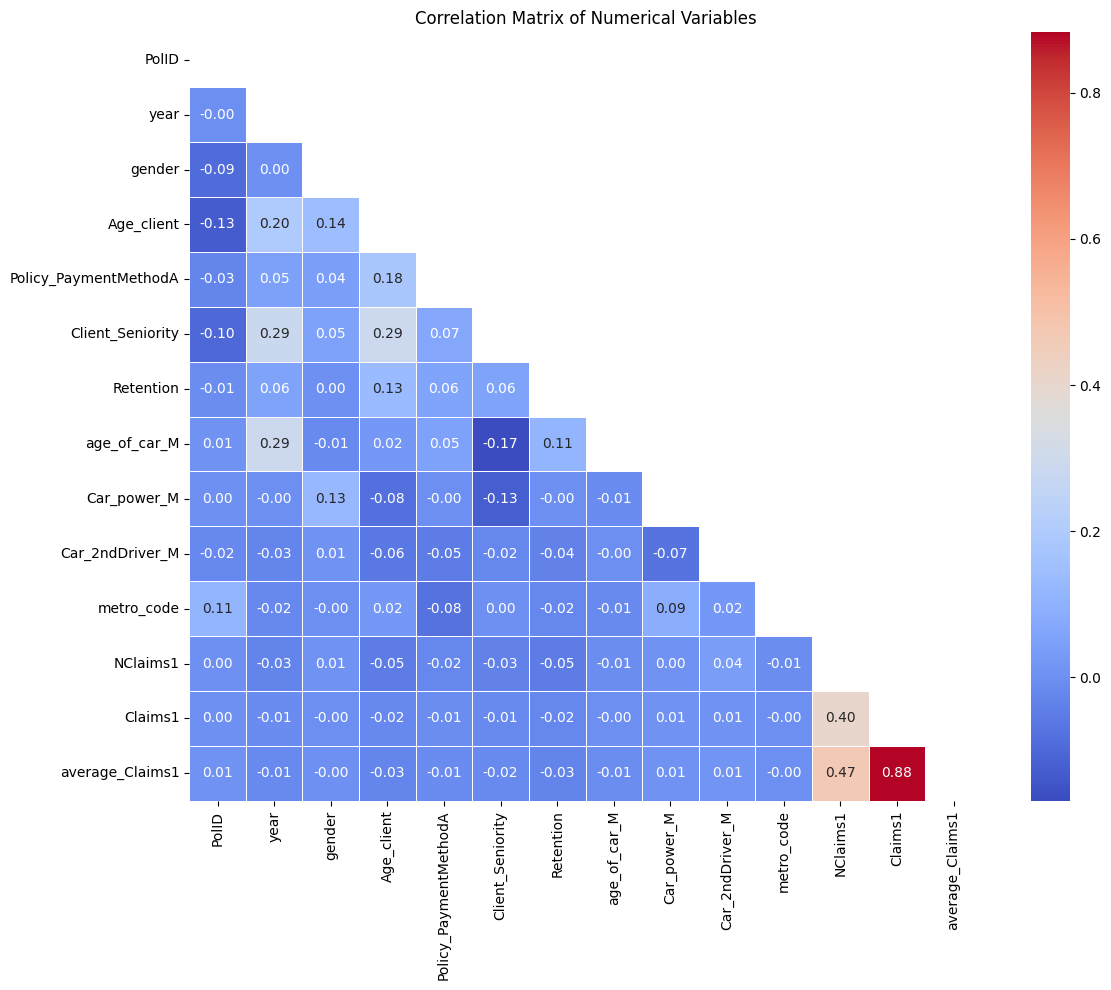

In [13]:
# Cell 9: 相関分析
# 数値変数の相関行列を計算
correlation_matrix = df.select_dtypes(include=['int64', 'float64']).corr()

# 相関行列をヒートマップで可視化
plt.figure(figsize=(12, 10))
mask = np.triu(correlation_matrix)
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', 
            linewidths=0.5, mask=mask)
plt.title('Correlation Matrix of Numerical Variables')
plt.tight_layout()
plt.show()

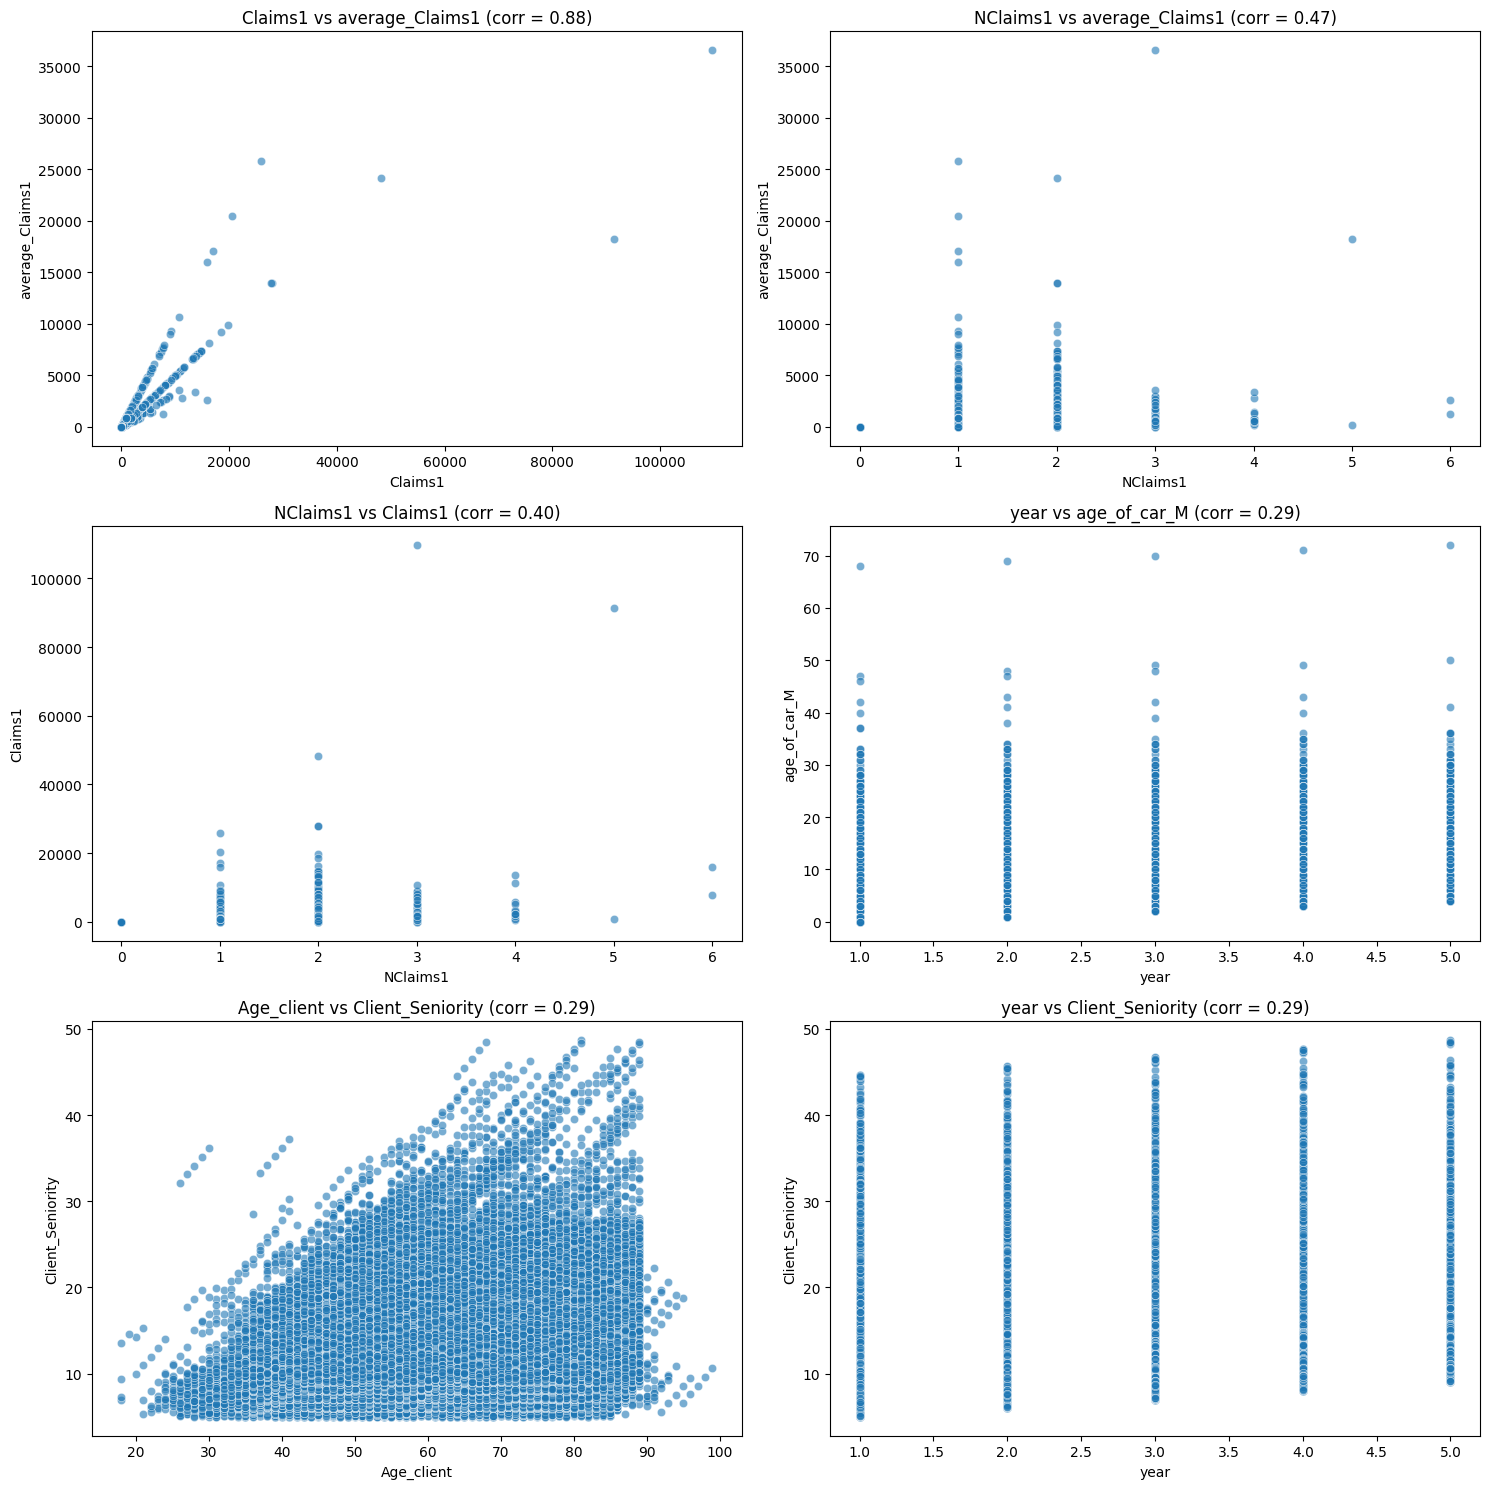

In [14]:
# Cell 10: 重要な相関ペアの散布図
def plot_top_correlations(dataframe, correlation_matrix, n_pairs=6):
    """相関係数の高いペアの散布図を表示する関数"""
    # 相関行列から対角成分を除いたペアを取得
    corr_pairs = []
    for i in range(len(correlation_matrix.columns)):
        for j in range(i+1, len(correlation_matrix.columns)):
            col1, col2 = correlation_matrix.columns[i], correlation_matrix.columns[j]
            corr = correlation_matrix.iloc[i, j]
            corr_pairs.append((col1, col2, abs(corr)))
    
    # 相関の絶対値で降順ソート
    corr_pairs.sort(key=lambda x: x[2], reverse=True)
    
    # 上位n_pairsのペアを表示
    n_rows = (n_pairs + 1) // 2
    fig = plt.figure(figsize=(15, n_rows * 5))
    
    for i, (col1, col2, corr) in enumerate(corr_pairs[:n_pairs]):
        ax = fig.add_subplot(n_rows, 2, i+1)
        sns.scatterplot(x=dataframe[col1], y=dataframe[col2], alpha=0.6, ax=ax)
        ax.set_title(f'{col1} vs {col2} (corr = {corr:.2f})')
    
    fig.tight_layout()
    plt.show()

# 重要な相関ペアの可視化
plot_top_correlations(df, correlation_matrix)

## 相関分析の結果

主な発見:
- 強い正の相関: [変数ペアを列挙]
- 強い負の相関: [変数ペアを列挙]
- 予想外の相関関係: [興味深い発見]

これらの相関関係は後のモデリング段階で重要になる可能性があります。

In [15]:
# Cell 11: グループ分析（オプション）
def group_analysis(dataframe, group_col, metric_col):
    """グループごとの統計量を計算・可視化する関数"""
    if group_col not in dataframe.columns or metric_col not in dataframe.columns:
        print(f"Column(s) not found in dataframe")
        return
    
    # グループごとの平均と標準偏差を計算
    grouped = dataframe.groupby(group_col)[metric_col].agg(['mean', 'std', 'count'])
    grouped = grouped.sort_values('mean', ascending=False)
    
    # 上位10グループの可視化
    plt.figure(figsize=(12, 6))
    sns.barplot(x=grouped.index[:10], y=grouped['mean'][:10])
    plt.title(f'Average {metric_col} by {group_col} (Top 10)')
    plt.xticks(rotation=45, ha='right')
    plt.ylabel(f'Mean {metric_col}')
    plt.tight_layout()
    plt.show()
    
    # 結果表示
    print(f"Statistics of {metric_col} grouped by {group_col} (Top 10):")
    display(grouped.head(10))

# カテゴリ変数と数値変数の組み合わせでグループ分析
# 例: 自動車ブランド別の平均価格など
if len(cat_cols) > 0 and len(numeric_cols) > 0:
    # 最初のカテゴリ変数と最初の数値変数でグループ分析を実行
    group_analysis(df, cat_cols[0], numeric_cols[0])

In [16]:
# Cell 12: 異常値検出
def detect_outliers(dataframe, columns):
    """IQR法を使用して異常値を検出する関数"""
    outlier_stats = []
    
    for col in columns:
        q1 = dataframe[col].quantile(0.25)
        q3 = dataframe[col].quantile(0.75)
        iqr = q3 - q1
        
        lower_bound = q1 - 1.5 * iqr
        upper_bound = q3 + 1.5 * iqr
        
        outliers = dataframe[(dataframe[col] < lower_bound) | (dataframe[col] > upper_bound)]
        
        outlier_stats.append({
            'Column': col,
            'Lower Bound': lower_bound,
            'Upper Bound': upper_bound,
            'Outlier Count': len(outliers),
            'Outlier %': (len(outliers) / len(dataframe)) * 100
        })
    
    return pd.DataFrame(outlier_stats)

# 数値変数の異常値検出
outlier_df = detect_outliers(df, numeric_cols)
print("Outlier Statistics:")
display(outlier_df)

Outlier Statistics:


,Column,Lower Bound,Upper Bound,Outlier Count,Outlier %
0,PolID,-20834.000000,60854.000000,0,0.000000
1,year,-2.000000,6.000000,0,0.000000
2,gender,1.000000,1.000000,27264,22.177574
3,Age_client,21.000000,101.000000,7,0.005694
4,Policy_PaymentMethodA,1.000000,1.000000,28191,22.931631
5,Client_Seniority,-1.858145,24.218515,3117,2.535486
6,Retention,1.000000,1.000000,29296,23.830480
7,age_of_car_M,-10.000000,30.000000,75,0.061008
8,Car_power_M,10.000000,202.000000,5089,4.139586
9,Car_2ndDriver_M,0.000000,0.000000,17026,13.849595


# 分析まとめと今後の展望

## 主要な発見
1. データセット概要: [行数、列数、変数タイプなど]
2. データ品質: [欠損値の状況、外れ値の存在など]
3. 分布の特徴: [特徴的な分布パターン]
4. 相関関係: [重要な変数間の関係]
5. グループ分析: [カテゴリごとの違い]

## モデリングへの示唆
- 前処理で対処すべき点: [欠損値処理、特徴エンジニアリングのアイデアなど]
- 有望な特徴量: [モデルに重要と思われる変数]
- 懸念事項: [バイアス、外れ値の影響など]

## 次のステップ
1. 特徴エンジニアリング: [派生変数の作成アイデア]
2. 欠損値と外れ値の処理: [具体的な戦略]
3. モデリング: [適したモデルタイプの提案]
4. 評価指標: [適切な評価方法]

このEDAを通じて、データの理解が深まり、効果的なモデル構築への道筋が見えてきました。